In [3]:
wav_path='./data/hey_xpeng/hey_xpeng_01.wav'

In [4]:
import torchaudio

signal, sr = torchaudio.load(wav_path)
print(signal.shape)

torch.Size([1, 18035])


In [5]:
from speechbrain.processing.features import STFT

winlen_ms=25
hoplen_ms=10
n_fft=400

compute_STFT = STFT(sample_rate=sr, win_length=winlen_ms, hop_length=hoplen_ms, n_fft=n_fft)
signal_STFT = compute_STFT(signal)

print(signal.shape)
print(signal_STFT.shape)

torch.Size([1, 18035])
torch.Size([1, 113, 201, 2])


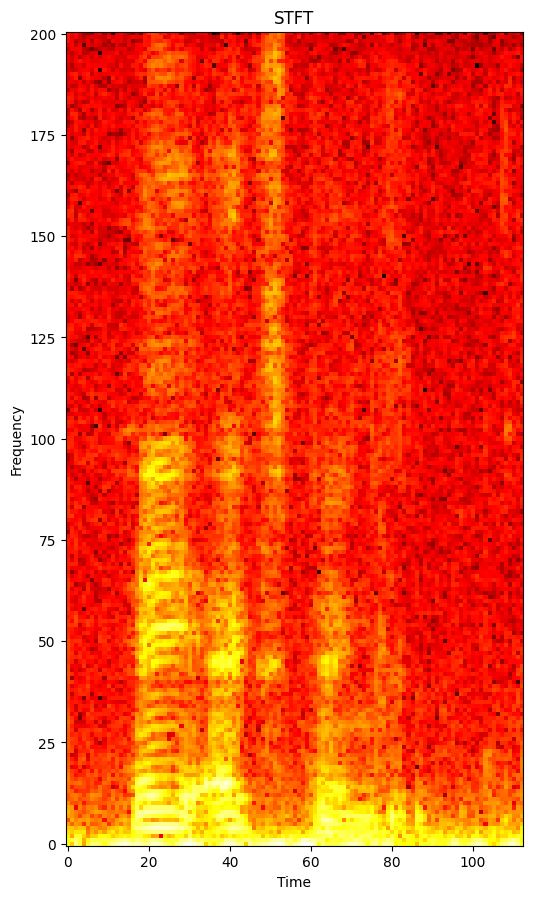

In [26]:
import torch
import matplotlib.pyplot as plt

spectrogram = signal_STFT.pow(2).sum(-1) # power spectrogram
spectrogram = spectrogram.squeeze(0).transpose(0,1)

spectrogram_log = torch.log(spectrogram) # for graphical convenience

def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(15), cm_to_inch(30)))
plt.imshow(spectrogram_log.squeeze(0), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title("STFT")
plt.show()

torch.Size([1, 113, 201, 2])
torch.Size([1, 113, 201])
torch.Size([1, 113, 40])


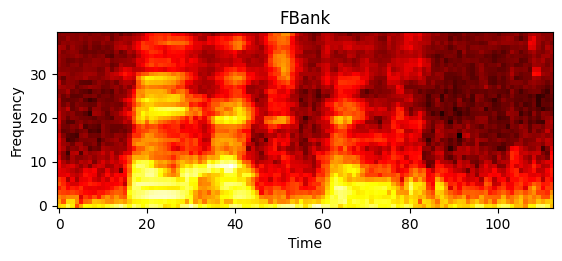

In [27]:
from speechbrain.processing.features import spectral_magnitude
from speechbrain.processing.features import Filterbank

mag = spectral_magnitude(signal_STFT)
compute_fbanks = Filterbank(n_mels=40)
fbanks = compute_fbanks(mag)

print(signal_STFT.shape)
print(mag.shape)
print(fbanks.shape)

plt.imshow(fbanks.squeeze(0).t(), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title("FBank")
plt.show()

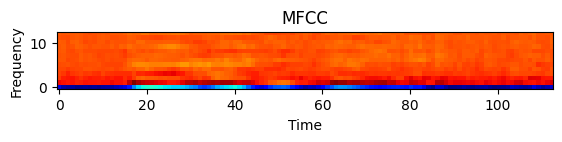

In [28]:
from speechbrain.lobes.features import MFCC
mfcc_maker = MFCC(n_mfcc=13, deltas=False, context=False)
mfccs = mfcc_maker(signal)

plt.imshow(mfccs.squeeze(0).t(), cmap=plt.cm.jet, interpolation='nearest', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title("MFCC")
plt.show()

# #Zoom
# plt.imshow(mfccs.squeeze(0).t()[:,0:50], cmap=plt.cm.jet, interpolation='nearest', origin='lower')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.show()